In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import Cdf
import numpy as np

In [2]:
with sqlite3.connect('../data/loc-res.db') as conn:
    delta_local = pd.read_sql('select * from delta_5pct', con=conn)

In [3]:
delta_local['resolver_name'] = 'Local Resolver'

In [4]:
delta_local = delta_local[['prb_id', 'country_code', 'continent_code', 'resolver_name',
                           'rt_do53', 'rt_dot', 'rt_delta']]

In [5]:
delta_local

,prb_id,country_code,continent_code,resolver_name,rt_do53,rt_dot,rt_delta
0,10342,US,NA,Local Resolver,10.6125,104.00170,-93.38920
1,14377,DE,EU,Local Resolver,21.3388,191.90675,-170.56795
2,16233,NL,EU,Local Resolver,4.2550,148.06850,-143.81350
3,17525,FR,EU,Local Resolver,7.7536,122.72300,-114.96940
4,17609,SE,EU,Local Resolver,1.0610,66.42740,-65.36640
5,18275,US,NA,Local Resolver,78.8898,383.77400,-304.88420
6,20324,NL,EU,Local Resolver,6.8814,156.55865,-149.67725
7,22890,NL,EU,Local Resolver,4.5404,146.84850,-142.30810
8,23214,SE,EU,Local Resolver,1.0560,117.80155,-116.74555
9,29989,NL,EU,Local Resolver,5.0730,145.90230,-140.82930


In [6]:
with sqlite3.connect('../data/pub-res.db') as conn:
    delta_pub = pd.read_sql('select * from delta_5pct', con=conn)

In [7]:
delta_pub

,prb_id,country_code,continent_code,resolver_name,rt_do53,rt_dot,rt_delta
0,10006,GB,EU,CleanBrowsing,22.13310,297.26800,-275.13490
1,10006,GB,EU,Cloudflare 1.1.1.1,19.16870,164.38140,-145.21270
2,10006,GB,EU,Google Public DNS,21.56290,155.04670,-133.48380
3,10006,GB,EU,Quad9,22.00785,177.32480,-155.31695
4,10006,GB,EU,UncensoredDNS,42.83000,958.34600,-915.51600
...,...,...,...,...,...,...,...
14587,35724,KR,AS,UncensoredDNS,19.22300,1343.76425,-1324.54125
14588,35742,ZA,AF,CleanBrowsing,180.02050,1258.35970,-1078.33920
14589,35742,ZA,AF,Cloudflare 1.1.1.1,2.10350,96.99155,-94.88805
14590,35742,ZA,AF,Google Public DNS,12.23660,279.46590,-267.22930


In [8]:
delta = delta_local.append(delta_pub)

In [9]:
delta

,prb_id,country_code,continent_code,resolver_name,rt_do53,rt_dot,rt_delta
0,10342,US,NA,Local Resolver,10.6125,104.00170,-93.38920
1,14377,DE,EU,Local Resolver,21.3388,191.90675,-170.56795
2,16233,NL,EU,Local Resolver,4.2550,148.06850,-143.81350
3,17525,FR,EU,Local Resolver,7.7536,122.72300,-114.96940
4,17609,SE,EU,Local Resolver,1.0610,66.42740,-65.36640
...,...,...,...,...,...,...,...
14587,35724,KR,AS,UncensoredDNS,19.2230,1343.76425,-1324.54125
14588,35742,ZA,AF,CleanBrowsing,180.0205,1258.35970,-1078.33920
14589,35742,ZA,AF,Cloudflare 1.1.1.1,2.1035,96.99155,-94.88805
14590,35742,ZA,AF,Google Public DNS,12.2366,279.46590,-267.22930


In [21]:
delta.describe()

,prb_id,rt_do53,rt_dot,rt_delta
count,14605.000000,14605.000000,14605.000000,14605.000000
mean,22948.642451,36.369321,443.181796,-406.812476
std,7857.002013,52.489013,716.688781,690.817830
min,10006.000000,0.529000,66.427400,-16688.868300
25%,15749.000000,9.612000,125.288200,-285.575900
50%,22702.000000,18.705000,175.447500,-154.488900
75%,30406.000000,37.562700,336.474000,-114.751900
max,35742.000000,592.291150,16739.958000,-65.366400


In [17]:
delta.groupby('continent_code')['rt_delta'].describe()

,count,mean,std,min,25%,50%,75%,max
continent_code,,,,,,,,
AF,206.0,-627.274806,700.305047,-4245.8459,-816.385712,-367.32435,-206.509125,-88.59480
AS,1295.0,-472.170354,596.324972,-4591.8904,-616.861175,-234.41290,-115.712175,-65.39785
EU,9488.0,-373.060670,689.606329,-16688.8683,-236.724300,-144.99655,-110.893750,-65.36640
NA,2849.0,-465.129757,762.404564,-4612.5029,-301.452300,-164.89730,-122.331400,-66.19040
OC,486.0,-426.043448,566.945460,-3916.1235,-302.571875,-188.40340,-130.985338,-70.08960
SA,281.0,-459.094517,417.677362,-2662.1098,-700.909800,-330.46895,-138.658650,-68.54500


In [18]:
delta.groupby('resolver_name')['rt_delta'].describe()

,count,mean,std,min,25%,50%,75%,max
resolver_name,,,,,,,,
CleanBrowsing,3021.0,-383.448490,446.977714,-2960.36585,-395.216800,-202.80935,-141.428000,-70.08960
Cloudflare 1.1.1.1,2967.0,-139.312710,76.832693,-1921.42740,-142.071900,-120.99700,-103.265275,-74.48980
Google Public DNS,3013.0,-139.605686,90.549446,-1897.20565,-148.550800,-115.93295,-97.983550,-65.39785
Local Resolver,13.0,-148.372046,56.747001,-304.88420,-155.951850,-143.81350,-116.745550,-65.36640
Quad9,3013.0,-179.764918,107.282806,-1915.20500,-201.826400,-149.84710,-117.330000,-86.69150
UncensoredDNS,2578.0,-1321.010488,1173.588139,-16688.86830,-1978.251837,-910.34150,-378.486575,-118.10275


In [10]:
delta['continent_code'].unique()

array(['NA', 'EU', 'AS', 'OC', 'AF', 'SA'], dtype=object)

In [11]:
delta['resolver_name'].unique()

array(['Local Resolver', 'CleanBrowsing', 'Cloudflare 1.1.1.1',
       'Google Public DNS', 'Quad9', 'UncensoredDNS'], dtype=object)

In [12]:
color_dict = {'Local Resolver': (0.12156862745098039,
  0.4666666666666667,
  0.7058823529411765),
 'CZ.NIC ODVR': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'CleanBrowsing': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Cloudflare 1.1.1.1': (1.0, 0.7333333333333333, 0.47058823529411764),
 'Comodo Secure DNS': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313),
 'DNS.WATCH': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'Google Public DNS': (0.8392156862745098,
  0.15294117647058825,
  0.1568627450980392),
 'OpenDNS': (1.0, 0.596078431372549, 0.5882352941176471),
 'OpenNIC': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'Oracle + Dyn': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'Quad9': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'SafeDNS': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'UncensoredDNS': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'VeriSign Public DNS': (0.9686274509803922,
  0.7137254901960784,
  0.8235294117647058),
 'Yandex.DNS': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'Neustar UltraRecursive': (0.7803921568627451,
  0.7803921568627451,
  0.7803921568627451)}

In [13]:
markers = {  'CleanBrowsing' : 'o',
             'Cloudflare 1.1.1.1' : 'v',
             'Comodo Secure DNS' : '^',
             'CZ.NIC ODVR' : '<',
             'Oracle + Dyn' : '>',
             'DNS.WATCH' : 's',
             'Google Public DNS' : 'p',
             'Neustar UltraRecursive' : 'h',
             'OpenDNS' : 'd',
             'OpenNIC' : '*',
             'Quad9' : '1',
             'SafeDNS' : '2',
             'UncensoredDNS' : '3',
             'VeriSign Public DNS' : '4',
             'Yandex.DNS' : 'x',
             'Local Resolver' : 'D'
         }

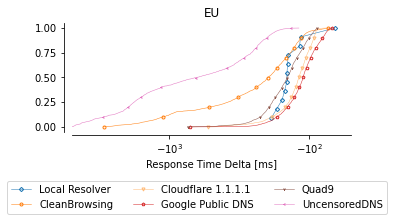

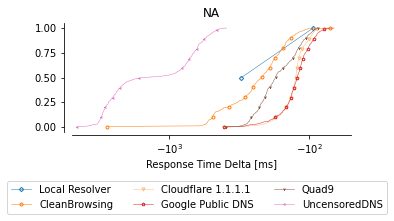

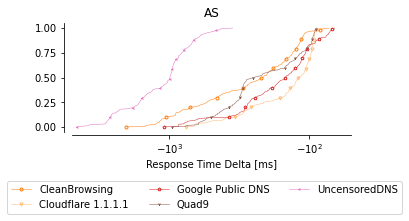

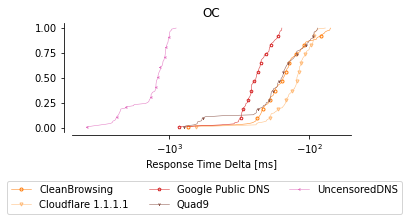

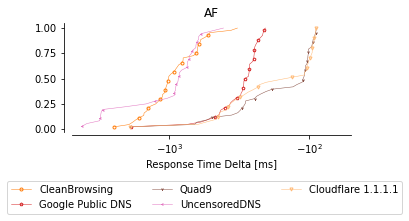

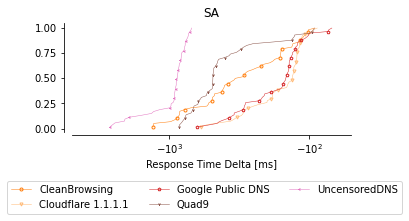

In [14]:
with open('cdfs/cdf-response-time-by-continent-delta-percentiles.csv', 'w+') as f:

    # one plot for each continent
    for cont in ['EU', 'NA', 'AS', 'OC', 'AF', 'SA']:

        delta_cont = delta[delta['continent_code'] == cont]

        fig, ax = plt.subplots(figsize=(5,2))

        # one line for each resolver
        for res in delta_cont['resolver_name'].unique():
            cdf = Cdf.MakeCdfFromList(delta_cont[delta_cont['resolver_name'] == res]['rt_delta'])
            ax.plot(cdf.xs, cdf.ps, label=res,
                    linestyle='-', linewidth=0.5, color=color_dict[res],
                    marker=markers[res], markersize=3, fillstyle='none', markevery=max(1, int(len(cdf.xs)/10))
                   )

            # write CDF to CSV 
            skip = max(1, int(len(cdf.xs)/150))
            f.write('--- %s (%s) ---\n' % (res, cont))
            for x, p in list(zip(cdf.xs, cdf.ps))[::skip]:
                f.write('%.2f \t %.5f\n' % (x, p))
            f.write('\n===========================\n\n')


        ax.set_title(cont)
        ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(-0.25, -0.8))
        ax.set_xscale('symlog')
        ax.set_xlabel('Response Time Delta [ms]')

        ax.grid(False)
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('axes', -0.03))
        ax.spines['left'].set_position(('axes', -0.03))
        
        ax.set_xlim([-5000, -50])


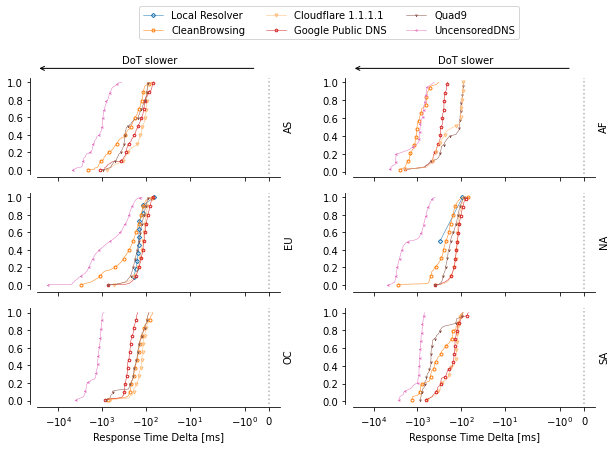

In [15]:
fig, axes = plt.subplots(figsize=(10,6), ncols=2, nrows=3, sharex=True)

# one plot for each continent
for ax, cont in list(zip([axis for subax in axes for axis in subax], ['AS', 'AF', 'EU', 'NA', 'OC', 'SA'])):


    delta_cont = delta[delta['continent_code'] == cont]

    # one line for each resolver
    for res in delta_cont['resolver_name'].unique():
        cdf = Cdf.MakeCdfFromList(delta_cont[delta_cont['resolver_name'] == res]['rt_delta'])
        ax.plot(cdf.xs, cdf.ps, label=res,
                linestyle='-', linewidth=0.5, color=color_dict[res],
                marker=markers[res], markersize=3, fillstyle='none', markevery=max(1, int(len(cdf.xs)/10))
               )

    ax.set_xscale('symlog')
    ax.grid(False)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('axes', -0.03))
    ax.spines['left'].set_position(('axes', -0.03))

    ax.set_yticks(np.arange(0, 1.1, 0.2))
    
    ax1_ = ax.twinx()
    ax1_.spines['right'].set_color('none')
    ax1_.spines['top'].set_color('none')
    ax1_.spines['left'].set_color('none')
    ax1_.spines['bottom'].set_color('none')
    ax1_.yaxis.set_ticks_position('none')
    ax1_.set_ylabel('%s' % cont)
    plt.setp(ax1_.get_yticklabels(), visible = False)
    
    ax.axvline(x=0, linestyle=':', color='black', alpha=0.3)

    if cont == 'EU':
        ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(0.4, 2.55))

    if cont in ['OC', 'SA']:
        ax.set_xlabel('Response Time Delta [ms]')
        
        
    if cont in ['AS', 'AF']:
        ax.annotate('', xy = (0.9, 1.1), xycoords = 'axes fraction', xytext = (0, 1.1), 
                    arrowprops = dict(arrowstyle = "<-"))

        ax.text(0.35, 1.15, "DoT slower", transform=ax.transAxes)

    plt.subplots_adjust(wspace=0.3)


fig.savefig('../plots/cdf-response-time-delta-all-in-one.pdf', bbox_inches='tight')
